In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные выплаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых клиент был связан с компанией 


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [2]:
data = pd.read_csv('vehicle_insurance.csv')
data_next=pd.read_csv('vehicle_insurance.csv')
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

Баланс классов:
0    8753
1    1247
Name: Response, dtype: int64

Проценты:
0    87.53
1    12.47
Name: Response, dtype: float64


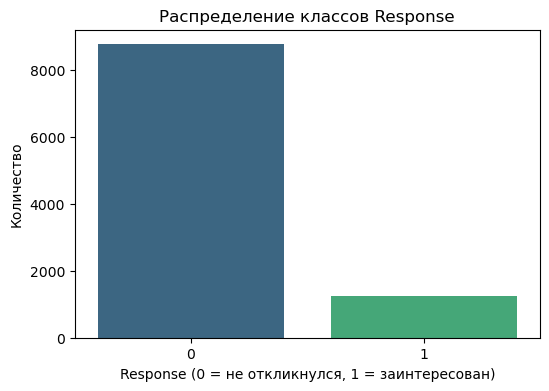

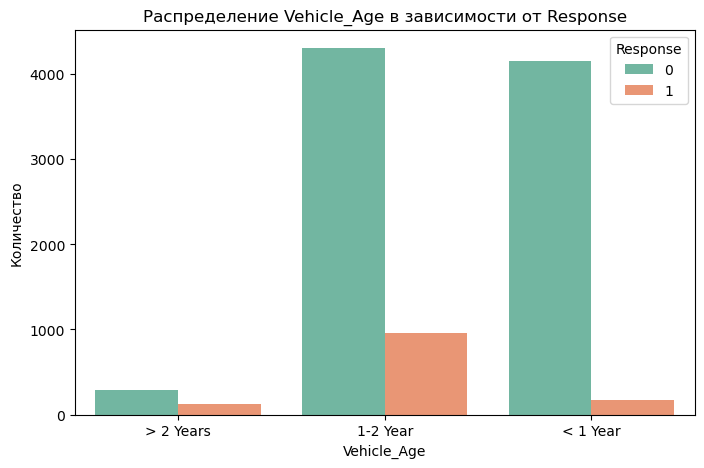


Процентное распределение Response по возрасту транспортного средства:
Response         0      1
Vehicle_Age              
1-2 Year     81.85  18.15
< 1 Year     96.00   4.00
> 2 Years    70.76  29.24


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = data  

# 1. Баланс классов
response_counts = df['Response'].value_counts()
response_percent = df['Response'].value_counts(normalize=True) * 100

print("Баланс классов:")
print(response_counts)
print("\nПроценты:")
print(response_percent)

# Визуализация баланса классов
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Response', palette='viridis')
plt.title('Распределение классов Response')
plt.xlabel('Response (0 = не откликнулся, 1 = заинтересован)')
plt.ylabel('Количество')
plt.show()

# 2. Распределение возраста ТС по Response
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Vehicle_Age', hue='Response', palette='Set2')
plt.title('Распределение Vehicle_Age в зависимости от Response')
plt.xlabel('Vehicle_Age')
plt.ylabel('Количество')
plt.legend(title='Response')
plt.show()


vehicle_age_distribution = pd.crosstab(df['Vehicle_Age'], df['Response'], normalize='index') * 100
print("\nПроцентное распределение Response по возрасту транспортного средства:")
print(vehicle_age_distribution.round(2))



In [3]:
object_col=data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=object_col, drop_first=True)

In [8]:
data.head(10)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0
5,24,1,33.0,0,2630.0,160.0,176,0,0,1,0,1
6,23,1,11.0,0,23367.0,152.0,249,0,1,1,0,1
7,56,1,28.0,0,32031.0,26.0,72,1,0,0,0,1
8,24,1,3.0,1,27619.0,152.0,28,0,0,1,0,0
9,32,1,6.0,1,28771.0,152.0,80,0,0,1,0,0


**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc,accuracy_score,roc_auc_score

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

accuracy_score: 0.852
f1_score: 0.270


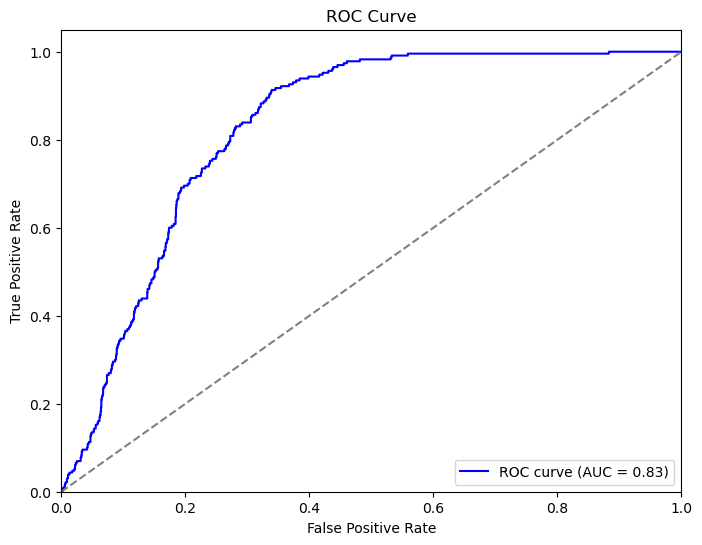

AUC: 0.828


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

### Your code is here

search=GradientBoostingClassifier(learning_rate = 1, random_state = 1, n_estimators = 100)
search.fit(X_train, y_train)
y_pred=search.predict(X_test)
acc=accuracy_score(y_test, y_pred)
f_1=f1_score(y_test, y_pred)

print(f"accuracy_score: {acc:.3f}")
print(f"f1_score: {f_1:.3f}")
y_prob = search.predict_proba(X_test)[:, 1]

# ROC-кривая и AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Визуализация ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Линия случайной модели
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Печать AUC
print(f"AUC: {roc_auc:.3f}")


**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

In [13]:
### Задаем сетку параметров



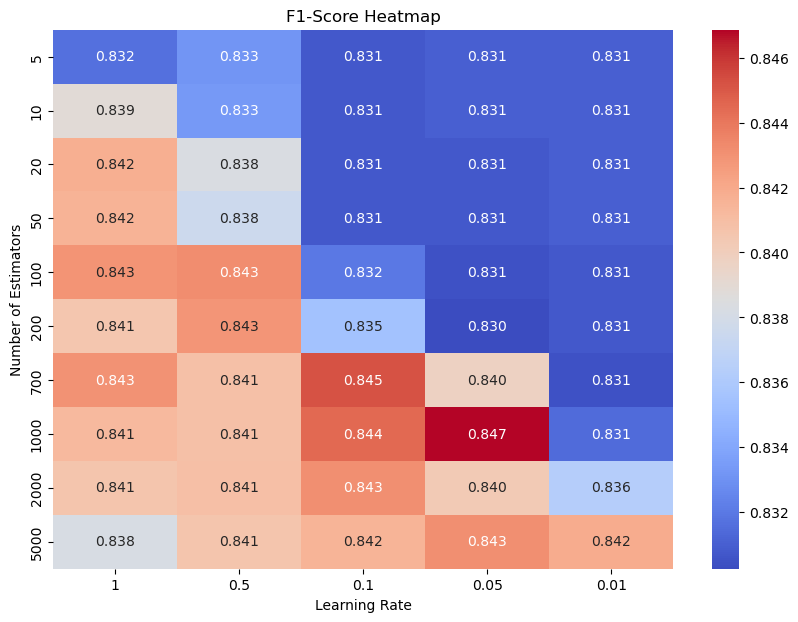

Максимальный f1-score: 0.847
Лучшие параметры: n_estimators=1000, learning_rate=0.05


In [14]:
### Your code is here
n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000, 2000, 5000]
learning_rate_list = [1, 0.5, 0.1, 0.05, 0.01]
# Создаем пустую матрицу для хранения результатов
f1_matrix = np.zeros((len(n_estimators_list), len(learning_rate_list)))

# Перебор параметров
for i, n_estimators in enumerate(n_estimators_list):
    for j, learning_rate in enumerate(learning_rate_list):
        # Создаем и обучаем модель
        model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=1)
        model.fit(X_train, y_train)
        
        # Предсказания и расчет f1-score
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Сохраняем результат в матрицу
        f1_matrix[i, j] = f1

# Визуализируем heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(f1_matrix, annot=True, fmt=".3f", cmap="coolwarm", xticklabels=learning_rate_list, yticklabels=n_estimators_list)
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.title('F1-Score Heatmap')
plt.show()

# Выводим максимальный f1-score и соответствующие параметры
max_f1 = np.max(f1_matrix)
max_indices = np.unravel_index(np.argmax(f1_matrix), f1_matrix.shape)
best_n_estimators = n_estimators_list[max_indices[0]]
best_learning_rate = learning_rate_list[max_indices[1]]

print(f"Максимальный f1-score: {max_f1:.3f}")
print(f"Лучшие параметры: n_estimators={best_n_estimators}, learning_rate={best_learning_rate}")

**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели. 
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов, используя `average='weighted'` для учёта баланса классов. 

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

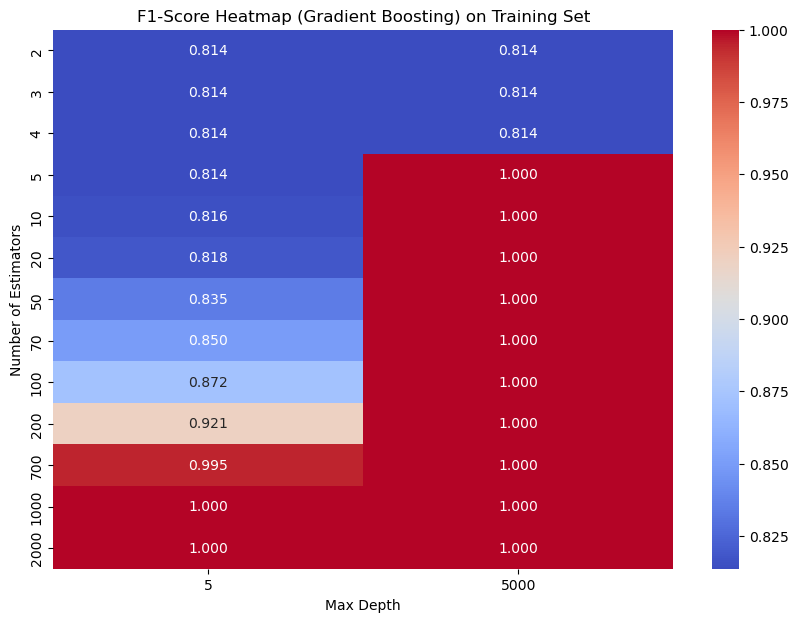

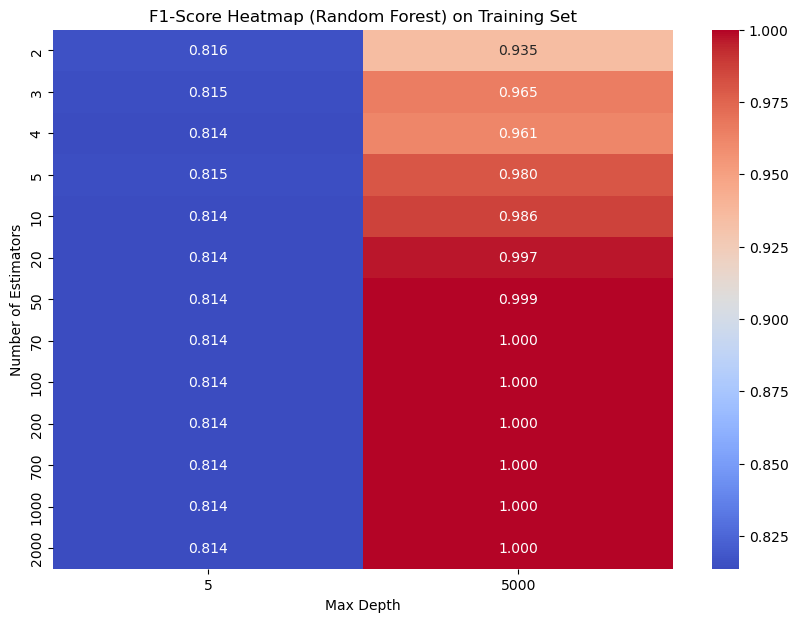

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score

# Параметры для перебора
n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]
max_depth_list = [5, 5000]

# Матрицы для хранения результатов
f1_matrix_bust = np.zeros((len(n_estimators_list), len(max_depth_list)))
f1_matrix_tree = np.zeros((len(n_estimators_list), len(max_depth_list)))

# Перебор параметров
for i, n_estimators in enumerate(n_estimators_list):
    for j, max_depth in enumerate(max_depth_list):
        
        # Модель градиентного бустинга
        model_bust = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=1)
        model_bust.fit(X_train, y_train)
        
        # Предсказания на обучающей выборке
        y_pred_bust_train = model_bust.predict(X_train)
        f1_bust = f1_score(y_train, y_pred_bust_train, average='weighted')
        f1_matrix_bust[i, j] = f1_bust

        # Модель случайного леса
        model_tree = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=1)
        model_tree.fit(X_train, y_train)
        
        # Предсказания на обучающей выборке
        y_pred_tree_train = model_tree.predict(X_train)
        f1_tree = f1_score(y_train, y_pred_tree_train, average='weighted')
        f1_matrix_tree[i, j] = f1_tree

# Визуализируем heatmap для градиентного бустинга
plt.figure(figsize=(10, 7))
sns.heatmap(f1_matrix_bust, annot=True, fmt=".3f", cmap="coolwarm", xticklabels=max_depth_list, yticklabels=n_estimators_list)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('F1-Score Heatmap (Gradient Boosting) on Training Set')
plt.show()

# Визуализируем heatmap для случайного леса
plt.figure(figsize=(10, 7))
sns.heatmap(f1_matrix_tree, annot=True, fmt=".3f", cmap="coolwarm", xticklabels=max_depth_list, yticklabels=n_estimators_list)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('F1-Score Heatmap (Random Forest) on Training Set')
plt.show()


**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют. 
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage. 

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

In [43]:
from catboost import CatBoostClassifier

### Your code is here
X_next = data_next.drop('Response', axis=1)
y_next = data_next['Response']
object_col=data_next.select_dtypes(include='object')
cat_features = [X_train2.columns.get_loc(col) for col in object_col]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_next,y_next,
                                                    random_state=0,
                                                    shuffle=True,
                                                  test_size=0.2)

model_cat=CatBoostClassifier(cat_features=cat_features)
model_cat.fit(X_train2,y_train2)



Learning rate set to 0.025035
0:	learn: 0.6524209	total: 13.5ms	remaining: 13.5s
1:	learn: 0.6213114	total: 24.4ms	remaining: 12.2s
2:	learn: 0.5922961	total: 35.9ms	remaining: 11.9s
3:	learn: 0.5658834	total: 50ms	remaining: 12.5s
4:	learn: 0.5423457	total: 62ms	remaining: 12.3s
5:	learn: 0.5180857	total: 73.7ms	remaining: 12.2s
6:	learn: 0.4986798	total: 85.3ms	remaining: 12.1s
7:	learn: 0.4802832	total: 95.8ms	remaining: 11.9s
8:	learn: 0.4619128	total: 110ms	remaining: 12.1s
9:	learn: 0.4465202	total: 122ms	remaining: 12.1s
10:	learn: 0.4341692	total: 135ms	remaining: 12.2s
11:	learn: 0.4204912	total: 147ms	remaining: 12.1s
12:	learn: 0.4147382	total: 159ms	remaining: 12s
13:	learn: 0.4094293	total: 171ms	remaining: 12s
14:	learn: 0.3996664	total: 183ms	remaining: 12s
15:	learn: 0.3902804	total: 194ms	remaining: 11.9s
16:	learn: 0.3851970	total: 207ms	remaining: 12s
17:	learn: 0.3768978	total: 221ms	remaining: 12s
18:	learn: 0.3694314	total: 234ms	remaining: 12.1s
19:	learn: 0.3634

In [53]:
feature_importances = model_cat.get_feature_importance()

# Создание DataFrame с признаками и их важностью
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': X_train2.columns,
    'Importance': feature_importances
})

# Сортировка по важности и вывод топ-3 признаков
top_3_features = importance_df.sort_values(by='Importance', ascending=False).head(3)
print(top_3_features)

              Feature  Importance
4  Previously_Insured   27.358911
6      Vehicle_Damage   21.367609
1                 Age   11.366585


**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost. 
Более понятно это на картинке:

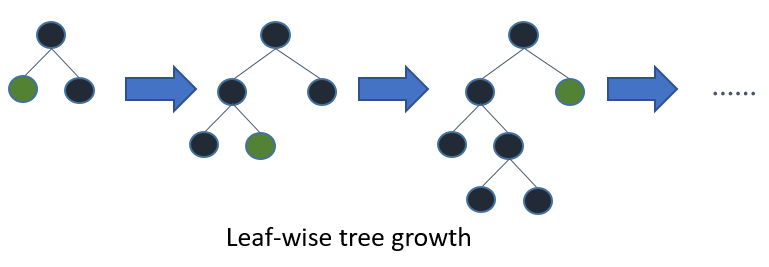

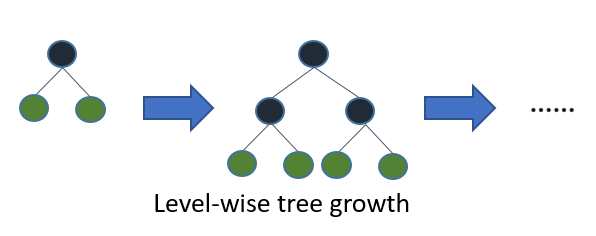

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных(закодированных) данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [4]:
data = pd.read_csv('vehicle_insurance.csv')
object_col=data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=object_col, drop_first=True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc,accuracy_score,roc_auc_score

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [5]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
params = {'classifier__n_estimators': [100, 500, 1000, 2000],
          'classifier__max_depth': [2, 3, 5, 100],
          'classifier__learning_rate': [0.1, 0.01, 0.001]}

### Your code is here
pipe=Pipeline([('classifier',LGBMClassifier())])
search_light=GridSearchCV(pipe,param_grid=params, n_jobs=10)
search_light.fit(X_train, y_train)
y_pred = search_light.predict(X_test)





In [7]:
# Выводим отчет о классификации
report = classification_report(y_test, y_pred, output_dict=True)

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1770
           1       0.00      0.00      0.00       230

    accuracy                           0.89      2000
   macro avg       0.44      0.50      0.47      2000
weighted avg       0.78      0.89      0.83      2000



In [10]:
search_light.best_params_

{'classifier__learning_rate': 0.01,
 'classifier__max_depth': 2,
 'classifier__n_estimators': 100}